In [ ]:
# Regression of Finite Element Modelling (FEM)
# Highest Accuracy: 100% RANSACRegressor

In [40]:
# Installations
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [43]:
# Data Manipulation
# Data Column Input:
  # 0: load parameters: ecc, N, gammaG.
  # 1: material parameters: Esoil, Econc.
  # 2: geometry parameters: Dbot, H1, H2, H3.

# Data Column Output:
  # 3: stress related results: Mrt, Mtt, Mrc, Mtc.

# Training File
dataFile = "//content//drive//MyDrive//Coding//Personal Projects//3: Machine Learning//Resources//FEMSimulation//FEMSimulation.csv"
data = pd.read_csv(dataFile)
data = data.drop(columns = ["Sample"])

Accuracy: 100.0 %


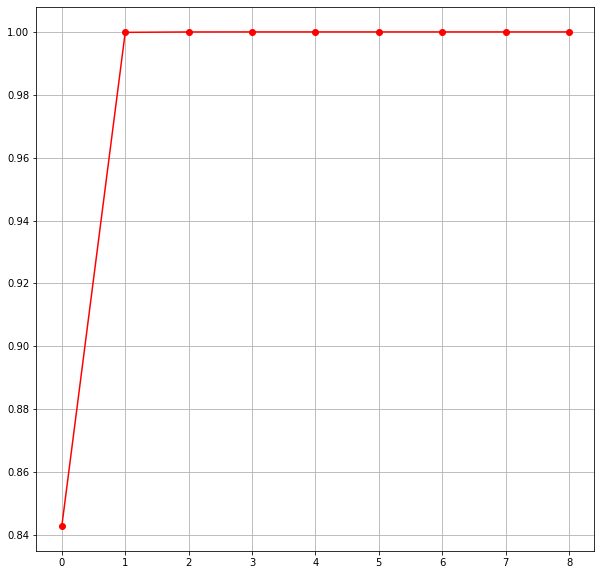

In [51]:
# Testing Data
# Remember to re-run Data Manipulation to Reset Data File
# Data Cleaning
x = data.drop(columns = ["Mr_t", "Mt_t", "Mr_c", "Mt_c"])
y = data["Mr_t"] # change to whatever of the four outputs above you want to predict for
pca = PCA()
x_pca = pca.fit_transform(x)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

# ECC does not correlate, hense get rid of it
x = data.drop(columns = "ecc")

# Testing Model
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = None)
model = RANSACRegressor()
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
accuracy = accuracy * 100
print("Accuracy:", accuracy, "%")